# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 586


['thompson',
 'port-aux-francais',
 'jamestown',
 'al-`ula',
 'waitangi',
 'douglas',
 'arraial do cabo',
 'aasiaat',
 'weno',
 'radford',
 'mercedes',
 'cabo san lucas',
 'happy valley-goose bay',
 'taiohae',
 'grytviken',
 'bandar labuan',
 'west island',
 'bismarck',
 'arauca',
 'san patricio',
 'college',
 'pascagoula',
 'olonkinbyen',
 'invercargill',
 'nur-sultan',
 'antofagasta',
 'south hedland',
 'namibe',
 'andergrove',
 'pacific grove',
 'blackmans bay',
 'ust-nera',
 'adamstown',
 'bethel',
 'georgetown',
 'utrik',
 'isafjordur',
 'albany',
 'labin',
 'pisco',
 'bardai',
 'laojunmiao',
 'atafu village',
 'al kharj',
 'cadale',
 'ilulissat',
 'dajal',
 'ghanzi',
 'laayoune plage',
 'fortuna',
 'puerto natales',
 'longyearbyen',
 'port elizabeth',
 'hermanus',
 'auki',
 'kingscliff',
 'fannuj',
 'wingham',
 'kalianget',
 'burang',
 'toga village',
 "chistopol'",
 'fallon',
 'talnakh',
 'edinburgh of the seven seas',
 'tovuz',
 'curup',
 'at taj',
 'bayan nur',
 'ezine',
 'coc

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&units={units}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_json = city_weather.json()
#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_json['coord']['lat']
        city_lng = city_json['coord']['lon']
        city_max_temp = city_json['main']['temp_max']
        city_humidity = city_json['main']['humidity']
        city_clouds = city_json['clouds']['all']
        city_wind = city_json['wind']['speed']
        city_country = city_json['sys']['country']
        city_date = city_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
#     finally:
#         break   
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# city_weather = requests.get(city_url)
# city_json = city_weather.json()
#city_json


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | al-`ula
City not found. Skipping...
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | douglas
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | aasiaat
Processing Record 9 of Set 1 | weno
Processing Record 10 of Set 1 | radford
Processing Record 11 of Set 1 | mercedes
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | happy valley-goose bay
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | bandar labuan
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | bismarck
Processing Record 19 of Set 1 | arauca
Processing Record 20 of Set 1 | san patricio
Processing Record 21 of Set 1 | co

Processing Record 38 of Set 4 | nar'yan-mar
Processing Record 39 of Set 4 | zhanibek
Processing Record 40 of Set 4 | ajdabiya
Processing Record 41 of Set 4 | puerto ayora
Processing Record 42 of Set 4 | mathba
Processing Record 43 of Set 4 | kailua-kona
Processing Record 44 of Set 4 | santona
Processing Record 45 of Set 4 | bubaque
Processing Record 46 of Set 4 | almeirim
Processing Record 47 of Set 4 | mersa matruh
Processing Record 48 of Set 4 | nurnberg
City not found. Skipping...
Processing Record 49 of Set 4 | palikir - national government center
Processing Record 0 of Set 5 | esqueda
Processing Record 1 of Set 5 | port alfred
Processing Record 2 of Set 5 | tidjikja
Processing Record 3 of Set 5 | hami
Processing Record 4 of Set 5 | skovorodino
Processing Record 5 of Set 5 | hamilton
Processing Record 6 of Set 5 | feijo
Processing Record 7 of Set 5 | alto araguaia
Processing Record 8 of Set 5 | ballina
Processing Record 9 of Set 5 | abeokuta
Processing Record 10 of Set 5 | markovo


Processing Record 29 of Set 8 | nea michaniona
Processing Record 30 of Set 8 | aroma
Processing Record 31 of Set 8 | koriyama
Processing Record 32 of Set 8 | kayangel
Processing Record 33 of Set 8 | kizner
Processing Record 34 of Set 8 | ta`u
Processing Record 35 of Set 8 | lazaro cardenas
Processing Record 36 of Set 8 | fortaleza
Processing Record 37 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 38 of Set 8 | prado
Processing Record 39 of Set 8 | antananarivo
Processing Record 40 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 41 of Set 8 | havre
Processing Record 42 of Set 8 | sidney
Processing Record 43 of Set 8 | nea moudhania
City not found. Skipping...
Processing Record 44 of Set 8 | nemuro
Processing Record 45 of Set 8 | khanty-mansiysk
Processing Record 46 of Set 8 | ocean pointe
City not found. Skipping...
Processing Record 47 of Set 8 | puerto cabezas
Processing Record 48 of Set 8 | lincoln city
Processing Record 49 of Set 8 | urzhar
P

Processing Record 17 of Set 12 | banda aceh
Processing Record 18 of Set 12 | preveza
Processing Record 19 of Set 12 | shahrak-e pabedana
City not found. Skipping...
Processing Record 20 of Set 12 | covington
Processing Record 21 of Set 12 | gwadar
Processing Record 22 of Set 12 | sittwe
Processing Record 23 of Set 12 | conde
Processing Record 24 of Set 12 | sanming
Processing Record 25 of Set 12 | sungai raya
Processing Record 26 of Set 12 | santa cruz
Processing Record 27 of Set 12 | abu jibeha
Processing Record 28 of Set 12 | aksu
Processing Record 29 of Set 12 | hithadhoo
Processing Record 30 of Set 12 | malir cantonment
City not found. Skipping...
Processing Record 31 of Set 12 | guerrero negro
Processing Record 32 of Set 12 | manado
Processing Record 33 of Set 12 | laguna salada
Processing Record 34 of Set 12 | maintirano
Processing Record 35 of Set 12 | boende
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_records(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,27.09,44,40,6.17,CA,1688337738
1,port-aux-francais,-49.3500,70.2167,5.20,83,61,14.07,TF,1688337819
2,jamestown,42.0970,-79.2353,21.96,95,100,2.06,US,1688337654
3,waitangi,-43.9535,-176.5597,8.34,57,94,12.15,NZ,1688337820
4,douglas,41.3000,-96.1670,31.25,46,40,2.57,US,1688337718


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,27.09,44,40,6.17,CA,1688337738
1,port-aux-francais,-49.3500,70.2167,5.20,83,61,14.07,TF,1688337819
2,jamestown,42.0970,-79.2353,21.96,95,100,2.06,US,1688337654
3,waitangi,-43.9535,-176.5597,8.34,57,94,12.15,NZ,1688337820
4,douglas,41.3000,-96.1670,31.25,46,40,2.57,US,1688337718


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

#### Latitude Vs. Humidity

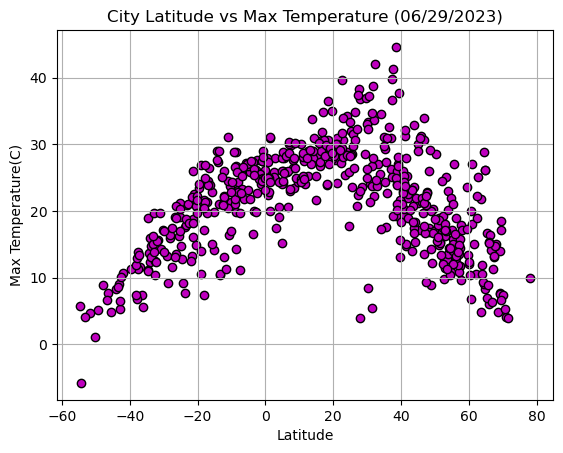

In [8]:
# Build scatter plot for latitude vs. temperature

x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x,y, color = 'm',edgecolors = 'k')

# Incorporate the other graph properties
plt.ylabel('Max Temperature(C)')
plt.xlabel("Latitude")
plt.title('City Latitude vs Max Temperature (06/29/2023)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

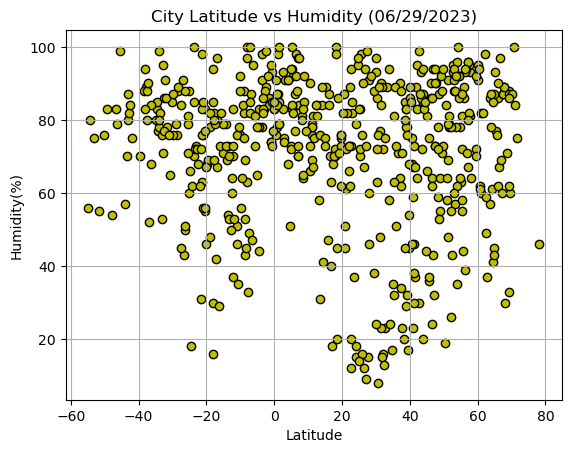

Latitude vs Humidity


In [9]:
# Build the scatter plots for latitude vs. humidity

x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x,y, color = 'y',edgecolors = 'k')

# Incorporate the other graph properties
plt.ylabel('Humidity(%)')
plt.xlabel("Latitude")
plt.title('City Latitude vs Humidity (06/29/2023)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()
print('Latitude vs Humidity')

#### Latitude Vs. Cloudiness

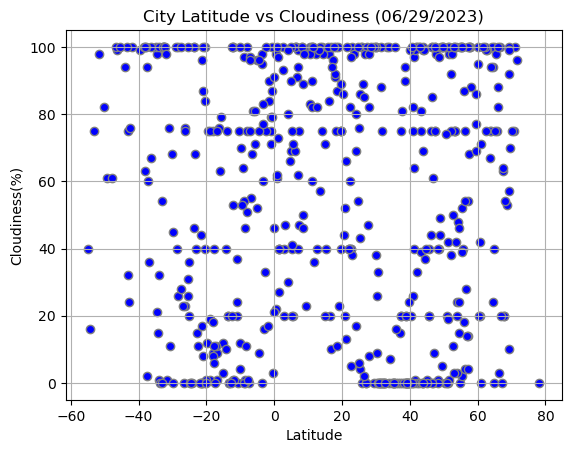

Latitude vs Cloudiness


In [10]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x,y, color = 'b',edgecolors = 'grey')

# Incorporate the other graph properties
plt.ylabel('Cloudiness(%)')
plt.xlabel("Latitude")
plt.title('City Latitude vs Cloudiness (06/29/2023)')
plt.grid()

# Incorporate the other graph properties

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()
print('Latitude vs Cloudiness')

#### Latitude vs. Wind Speed Plot

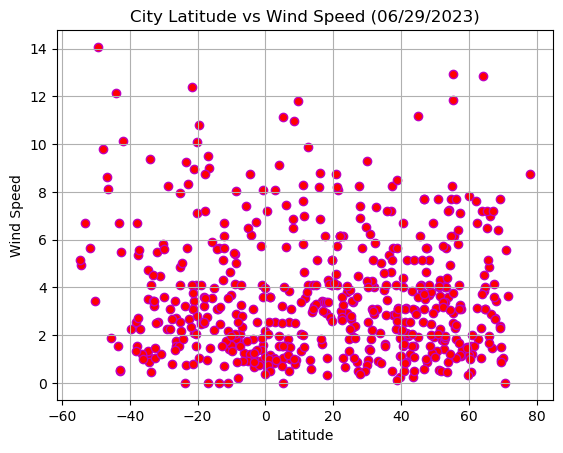

In [11]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x,y, color = 'r',edgecolors = 'm')


# Incorporate the other graph properties
plt.ylabel('Wind Speed')
plt.xlabel("Latitude")
plt.title('City Latitude vs Wind Speed (06/29/2023)')
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linregression(dfx,dfy):
    res = linregress(x, y)
    return res
    
   


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,27.09,44,40,6.17,CA,1688337738
2,jamestown,42.0970,-79.2353,21.96,95,100,2.06,US,1688337654
4,douglas,41.3000,-96.1670,31.25,46,40,2.57,US,1688337718
6,aasiaat,68.7098,-52.8699,4.90,71,53,6.39,GL,1688337821
7,weno,7.4515,151.8468,29.97,84,75,3.09,FM,1688337821


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port-aux-francais,-49.3500,70.2167,5.20,83,61,14.07,TF,1688337819
3,waitangi,-43.9535,-176.5597,8.34,57,94,12.15,NZ,1688337820
5,arraial do cabo,-22.9661,-42.0278,20.92,73,40,5.66,BR,1688337820
9,mercedes,-34.6515,-59.4307,18.91,83,98,4.74,AR,1688337499
12,grytviken,-54.2811,-36.5092,-5.77,80,16,4.95,GS,1688337822


###  Temperature vs. Latitude Linear Regression Plot

 The r-value is -0.6179672760520256


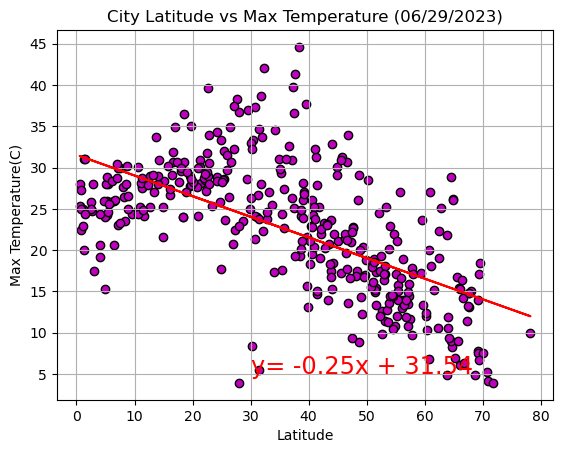

In [15]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
lreg = linregression(x,y)
r = lreg.rvalue
rsq = r**2
int = round(lreg.intercept, 2)
slope = round(lreg.slope, 2)
line_eq = f"y= {slope}x + {int}"

plt.scatter(x,y, color = 'm',edgecolors = 'k')

# Incorporate the other graph properties
plt.ylabel('Max Temperature(C)')
plt.xlabel("Latitude")
plt.title('City Latitude vs Max Temperature (06/29/2023)')
plt.grid()

# plot linear regression line
plt.plot(x, int + slope*x, 'r')

# place linear reg equation on plot
plt.text(30,5, line_eq, size='xx-large', color = 'r')


# Save the figure
plt.savefig("output_data/FigA.png")

# Show plot
print(f" The r-value is {r}")
plt.show()

 The r-value is 0.8074729544123453


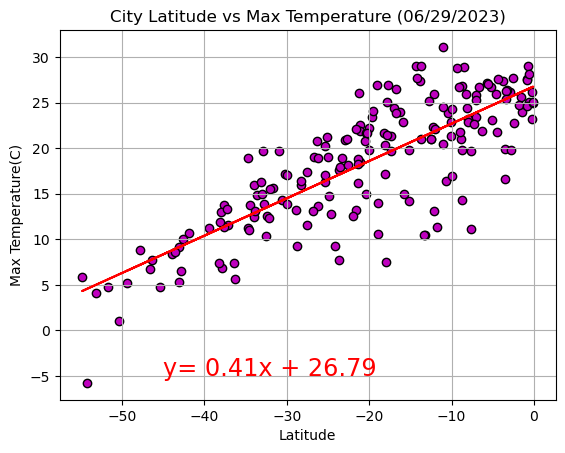

In [16]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
lreg = linregression(x,y)
r = lreg.rvalue
rsq = r**2
int = round(lreg.intercept, 2)
slope = round(lreg.slope, 2)
line_eq = f"y= {slope}x + {int}"

plt.scatter(x,y, color = 'm',edgecolors = 'k')

# Incorporate the other graph properties
plt.ylabel('Max Temperature(C)')
plt.xlabel("Latitude")
plt.title('City Latitude vs Max Temperature (06/29/2023)')
plt.grid()

# plot linear regression line
plt.plot(x, int + slope*x, 'r')

# place linear reg equation on plot
plt.text(-45,-5, line_eq, size='xx-large', color = 'r')


# Save the figure
plt.savefig("output_data/FigB.png")

# Show plot
print(f" The r-value is {r}")
plt.show()

**Discussion about the linear relationship:** Based on R-values there is a significant correlation between temperature and latitude. Correlation is not closer to perfect significance potentially because the area between the tropical latitudes has less fluctuation and these values do not adjust for altitude. 

### Humidity vs. Latitude Linear Regression Plot

 The r-value is -0.03858854464188951


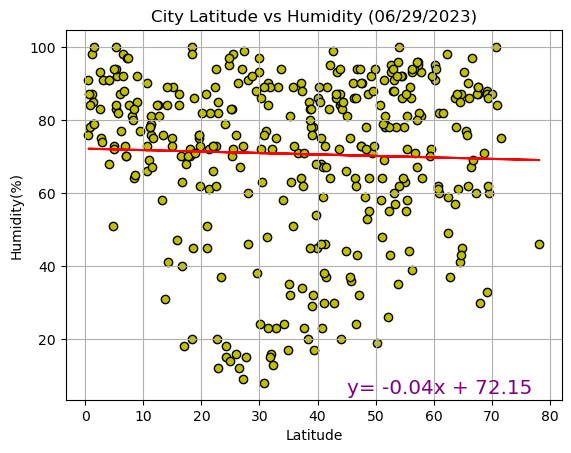

In [17]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
lreg = linregression(x,y)
r = lreg.rvalue
rsq = r**2
int = round(lreg.intercept, 2)
slope = round(lreg.slope, 2)
line_eq = f"y= {slope}x + {int}"

plt.scatter(x,y, color = 'y',edgecolors = 'k')

# Incorporate the other graph properties
plt.ylabel('Humidity(%)')
plt.xlabel("Latitude")
plt.title('City Latitude vs Humidity (06/29/2023)')
plt.grid()

# plot linear regression line
plt.plot(x, int + slope*x, 'r')

# place linear reg equation on plot
plt.text(45,5, line_eq, size='x-large', color = 'purple')


# Save the figure
plt.savefig("output_data/FigC.png")

# Show plot
print(f" The r-value is {r}")
plt.show()

 The r-value is -0.01886166577201094


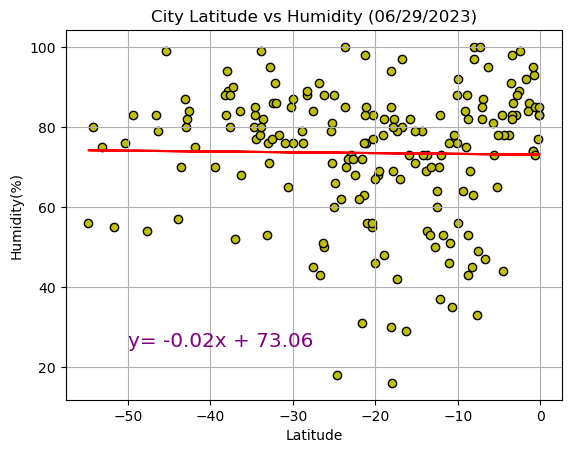

In [18]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
lreg = linregression(x,y)
r = lreg.rvalue
rsq = r**2
int = round(lreg.intercept, 2)
slope = round(lreg.slope, 2)
line_eq = f"y= {slope}x + {int}"

plt.scatter(x,y, color = 'y',edgecolors = 'k')

# Incorporate the other graph properties
plt.ylabel('Humidity(%)')
plt.xlabel("Latitude")
plt.title('City Latitude vs Humidity (06/29/2023)')
plt.grid()

# plot linear regression line
plt.plot(x, int + slope*x, 'r')

# place linear reg equation on plot
plt.text(-50,25, line_eq, size='x-large', color = 'purple')


# Save the figure
plt.savefig("output_data/FigD.png")

# Show plot
print(f" The r-value is {r}")
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

 The r-value is -0.09326587538515348


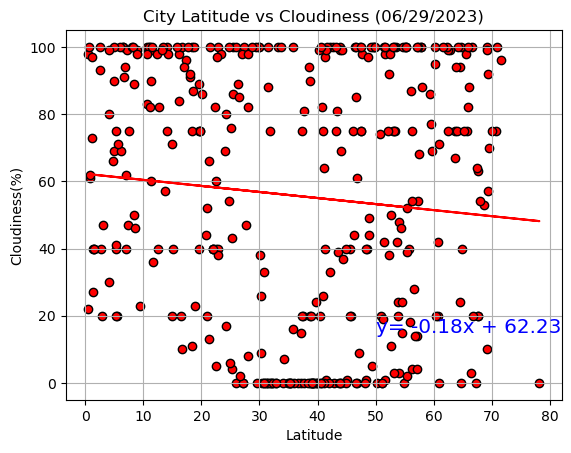

In [19]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
lreg = linregression(x,y)
r = lreg.rvalue
rsq = r**2
int = round(lreg.intercept, 2)
slope = round(lreg.slope, 2)
line_eq = f"y= {slope}x + {int}"

plt.scatter(x,y, color = 'r',edgecolors = 'k')

# Incorporate the other graph properties
plt.ylabel('Cloudiness(%)')
plt.xlabel("Latitude")
plt.title('City Latitude vs Cloudiness (06/29/2023)')
plt.grid()

# plot linear regression line
plt.plot(x, int + slope*x, 'r')

# place linear reg equation on plot
plt.text(50,15, line_eq, size='x-large', color = 'blue')


# Save the figure
plt.savefig("output_data/FigE.png")

# Show plot
print(f" The r-value is {r}")
plt.show()

 The r-value is -0.11003715273469228


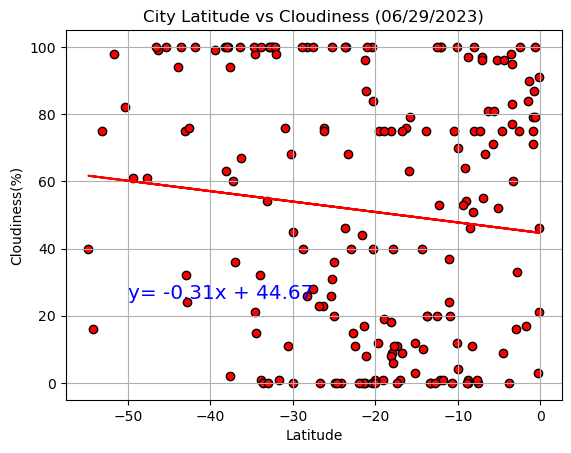

In [20]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
lreg = linregression(x,y)
r = lreg.rvalue
rsq = r**2
int = round(lreg.intercept, 2)
slope = round(lreg.slope, 2)
line_eq = f"y= {slope}x + {int}"

plt.scatter(x,y, color = 'r',edgecolors = 'k')

# Incorporate the other graph properties
plt.ylabel('Cloudiness(%)')
plt.xlabel("Latitude")
plt.title('City Latitude vs Cloudiness (06/29/2023)')
plt.grid()

# plot linear regression line
plt.plot(x, int + slope*x, 'r')

# place linear reg equation on plot
plt.text(-50,25, line_eq, size='x-large', color = 'blue')


# Save the figure
plt.savefig("output_data/FigF.png")

# Show plot
print(f" The r-value is {r}")
plt.show()

**Discussion about the linear relationship:** Small r-value shows that there is little correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

 The r-value is 0.030738239458544755


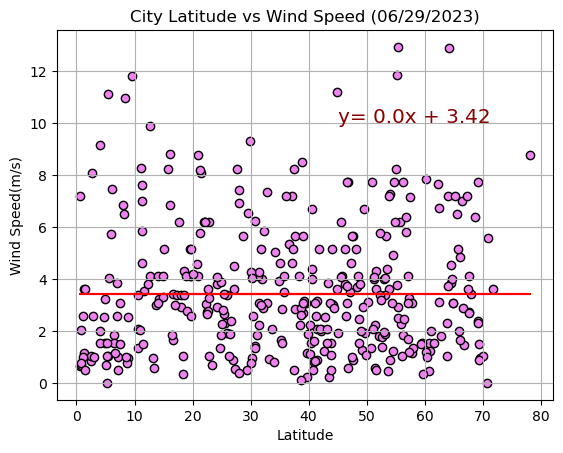

In [21]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
lreg = linregression(x,y)
r = lreg.rvalue
rsq = r**2
int = round(lreg.intercept, 2)
slope = round(lreg.slope, 2)
line_eq = f"y= {slope}x + {int}"

plt.scatter(x,y, color = 'violet',edgecolors = 'k')

# Incorporate the other graph properties
plt.ylabel('Wind Speed(m/s)')
plt.xlabel("Latitude")
plt.title('City Latitude vs Wind Speed (06/29/2023)')
plt.grid()

# plot linear regression line
plt.plot(x, int + slope*x, 'r')

# place linear reg equation on plot
plt.text(45,10, line_eq, size='x-large', color = 'darkred')


# Save the figure
plt.savefig("output_data/FigG.png")

# Show plot
print(f" The r-value is {r}")
plt.show()

 The r-value is -0.22832996981798442


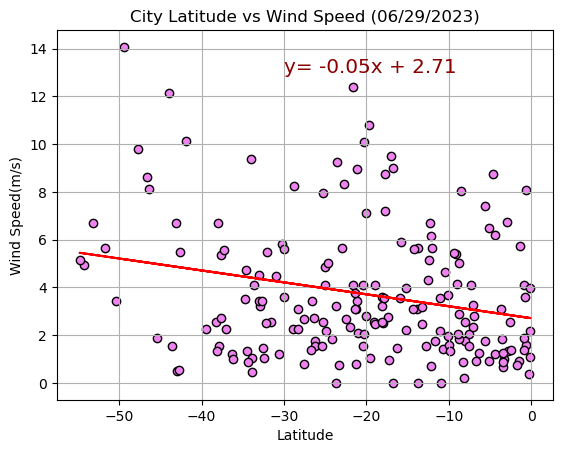

In [23]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
lreg = linregression(x,y)
r = lreg.rvalue
rsq = r**2
int = round(lreg.intercept, 2)
slope = round(lreg.slope, 2)
line_eq = f"y= {slope}x + {int}"

plt.scatter(x,y, color = 'violet',edgecolors = 'k')

# Incorporate the other graph properties
plt.ylabel('Wind Speed(m/s)')
plt.xlabel("Latitude")
plt.title('City Latitude vs Wind Speed (06/29/2023)')
plt.grid()

# plot linear regression line
plt.plot(x, int + slope*x, 'r')

# place linear reg equation on plot
plt.text(-30,13, line_eq, size='x-large', color = 'darkred')


# Save the figure
plt.savefig("output_data/FigH.png")

# Show plot
print(f" The r-value is {r}")
plt.show()

**Discussion about the linear relationship:** The very low r values indicate that there is little correlation between Latitude and Wind Speed